<a href="https://colab.research.google.com/github/OmerRosen/Kaggle/blob/main/IMDB_2022_Hit_or_Flop_Model_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
skip_slow_processes = True

# Model Exploring - Useful Functions

Model Exploring</b><br>
In this section we will train and fine-turn various models to achieve the best prediction on our test dataset.

## Importing libraries

In [2]:
import os
import math
import warnings
import itertools
from timeit import default_timer as timer

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup 
import re
import time
import progressbar

from sklearn.model_selection import cross_val_score, train_test_split,cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc,confusion_matrix
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import seaborn as sns
import inspect


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

import xgboost as xgb

from sklearn.metrics import mean_squared_error

# Load Processed Dataset

In [3]:
binary_columns = ['genere_action', 'genere_adventure', 'genere_fantasy', 'language_english', 'genere_comedy', 'language_mandarin', 'genere_horror', 'genere_thriller', 'language_spanish', 'genere_crime', 'genere_drama', 'language_russian', 'genere_history', 'language_italian', 'language_french', 'genere_romance', 'genere_mystery', 'genere_sci-fi', 'language_japanese', 'genere_animation', 'language_german', 'language_latin', 'language_arabic', 'genere_biography', 'language_hindi', 'language_chinese', 'genere_music', 'genere_sport', 'language_portuguese', 'genere_family', 'language_american sign language', 'genere_musical', 'language_hebrew', 'genere_war', 'genere_western', 'was_budget_missing', 'rating_catg_G', 'rating_catg_PG-13', 'rating_catg_R', 'rating_catg_Unrated', 'release_month_April', 'release_month_August', 'release_month_December', 'release_month_February', 'release_month_January', 'release_month_July', 'release_month_June', 'release_month_March', 'release_month_May', 'release_month_November', 'release_month_October', 'release_month_September', 'budget_currency_CAD', 'budget_currency_EUR', 'budget_currency_GBP', 'budget_currency_RUB', 'budget_currency_USD']
numerical_columns = ['budget_usd', 'runtime_min', 'title_length', 'movie_desc_length', 'release_year', 'cast_count_total', 'cast_count_director', 'cast_count_writer', 'cast_count_cast', 'cast_count_producer', 'cast_count_composer', 'cast_count_cinematographer', 'cast_count_editor', 'cast_count_casting_director', 'cast_count_production_designer', 'cast_count_art_director', 'cast_count_set_decorator', 'cast_count_costume_designer', 'cast_count_production_manager', 'cast_count_special_effects', 'cast_count_visual_effects', 'cast_count_animation_department', 'cast_count_casting_department', 'cast_count_location_management', 'cast_count_music_department', 'cast_count_script_department', 'cast_count_transportation_department', 'cast_count_miscellaneous', 'cast_count_thanks', 'genre__count', 'language__count', 'main_crew_count', 'crew_age_avg', 'crew_age_missing', 'crew_female_count', 'crew_lgbt_count', 'crew_prestige_wins', 'crew_prestige_nominations', 'crew_awards_nominations']


In [4]:

base_folder_path = "/content/drive/My Drive/Harvard HW/Course 4 - Final Project"
file_path = os.path.join(base_folder_path,"processed_dataset.csv")
X = pd.read_csv(file_path)
X

,movie_id,genere_action,genere_adventure,genere_fantasy,language_english,genere_comedy,language_mandarin,genere_horror,genere_thriller,language_spanish,...,release_month_October,release_month_September,budget_currency_CAD,budget_currency_EUR,budget_currency_GBP,budget_currency_RUB,budget_currency_USD,y_opening_weekend_us_canada,y_gross_us_canada,y_metascore
0,tt1630029,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,7.7,683701972.0,67.0
1,tt6710474,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,7.9,77191785.0,81.0
2,tt9764362,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,7.2,38501125.0,71.0
3,tt7888964,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,7.4,27568035.0,64.0
4,tt10640346,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,7.2,15351455.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,tt7084614,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,1,4.5,NaN,NaN
3897,tt11378070,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,5.0,NaN,NaN
3898,tt9278074,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,3.2,NaN,NaN
3899,tt9510324,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,4.9,NaN,NaN


In [5]:
y_opening_weekend_us_canada = X['y_opening_weekend_us_canada']
y_gross_us_canada = X['y_gross_us_canada']
y_metascore = X['y_metascore'] 
y_user_rating = X['y_opening_weekend_us_canada']

X_ohe_reduced = X[binary_columns+numerical_columns].copy()

List of models and hyper-parameters that we would like to examine:

## Function: Construct Hyper Parameter table:

The function is meant to iterate over our list of models, match them with the hyper-parameters relevant to them and provide a row for each model-parameter-combination.:<br>

In [6]:
all_model_types = {'LinearRegression':LinearRegression()
                  ,'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                  ,'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

Since different models have different hyper-parameters, we have composed a list of all parameters across our models and the values for each hyper parameter we would like to explore.

In [7]:
parametersOfValue = {
    'fit_intercept':[True,False],
    'n_neighbors':[2,4,8,15,50,80],
    'max_depth':[3,80],
    'learning_rate':[0.01],
    'random_state':[1],
    'n_estimators':[500]
    }

if skip_slow_processes==False:
  parametersOfValue['n_estimators'] = [500, 1000, 1500]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [8]:
# get lists and output a dict of combinations:

def create_combination_dict(classifierName,parametersOfValue):
    prop_combinations = list(itertools.product(*(parametersOfValue[Name] for Name in parametersOfValue)))
    combinationsDict ={}
    for i,item in enumerate(prop_combinations):
        modelTempName = "%s_%s"%(classifierName,i)
        #print(modelTempName)
        combinationsDict[modelTempName]={'model_type':classifierName}
        for j,colName in enumerate(parametersOfValue.keys()):
            combinationsDict[modelTempName][colName]=item[j]
    
    
    return combinationsDict

<br>The get_hyperparameter_combinations_per_classifier function receives a classifier and creates n rows of hyper-parameter combinations (Based on parametersOfValue list)

In [9]:
def get_hyperparameter_combinations_per_classifier(classifierName,regression_model,parametersOfValue):

    # Extract the hyper-parameters from our selected model:
    paramList = regression_model.get_params()

    classifierParametsOfValue = {}
    
    # Iterate over the parameters and match them to the parameter of value list:
    for param in paramList:
        if param in parametersOfValue.keys():
            classifierParametsOfValue[param]=parametersOfValue[param]

    # Convert list of hyper-parameters into a dictionary of parameter-combination
    combinationsDict_ForModel = create_combination_dict(classifierName,classifierParametsOfValue)

    relevantParametersForModel = combinationsDict_ForModel[list(combinationsDict_ForModel.keys())[0]].keys()
    print('Model Type: %s - %s hyper-parameter combinations'%(classifierName,len(combinationsDict_ForModel)))
    
    return combinationsDict_ForModel


### --------------------------------------------------------------------------------------------------------------------###
#Example run:


classifierName,regression_model = ('LinearRegression',LinearRegression())
combinationsDict_ForModel = get_hyperparameter_combinations_per_classifier(classifierName,regression_model,parametersOfValue=parametersOfValue)
pd.DataFrame(combinationsDict_ForModel).T.head(10)

Model Type: LinearRegression - 2 hyper-parameter combinations


,model_type,fit_intercept
LinearRegression_0,LinearRegression,True
LinearRegression_1,LinearRegression,False


<br>We then over our list of model, and for each model retrieve a list of all available hyper-parameter combinations and append them to dictionary

In [10]:
def get_all_model_combinations(dict_of_models,parametersOfValue):
  all_model_combinations = {}

  for classifierName,regression_model in dict_of_models.items():
      #print(classifierName,regression_model)
      combinationsDict_ForModel = get_hyperparameter_combinations_per_classifier(classifierName,regression_model,parametersOfValue=parametersOfValue)
      #print(combinationsDict_ForModel)
      all_model_combinations.update(combinationsDict_ForModel)

  all_model_combinations_df = pd.DataFrame(all_model_combinations).T
  return all_model_combinations_df

all_model_combinations_df = get_all_model_combinations(all_model_types,parametersOfValue)
all_model_combinations_df

Model Type: LinearRegression - 2 hyper-parameter combinations
Model Type: DecisionTreeRegressor - 2 hyper-parameter combinations
Model Type: BaggingRegressor  - 1 hyper-parameter combinations
Model Type: RandomForestRegressor - 2 hyper-parameter combinations
Model Type: AdaBoostRegressor - 1 hyper-parameter combinations
Model Type: XGBRegressor  - 2 hyper-parameter combinations


,model_type,fit_intercept,max_depth,random_state,n_estimators,learning_rate
LinearRegression_0,LinearRegression,True,NaN,NaN,NaN,NaN
LinearRegression_1,LinearRegression,False,NaN,NaN,NaN,NaN
DecisionTreeRegressor_0,DecisionTreeRegressor,NaN,3,1,NaN,NaN
DecisionTreeRegressor_1,DecisionTreeRegressor,NaN,80,1,NaN,NaN
BaggingRegressor _0,BaggingRegressor,NaN,NaN,1,500,NaN
RandomForestRegressor_0,RandomForestRegressor,NaN,3,1,500,NaN
RandomForestRegressor_1,RandomForestRegressor,NaN,80,1,500,NaN
AdaBoostRegressor_0,AdaBoostRegressor,NaN,NaN,1,500,0.01
XGBRegressor _0,XGBRegressor,NaN,3,1,500,0.01
XGBRegressor _1,XGBRegressor,NaN,80,1,500,0.01


<br>Our final result is a data frame containing all the model types and their hyper-parameters that we will use in our test.

In [11]:
print(f'There are {all_model_combinations_df.shape[0]} different model combinations for us to test')
all_model_combinations_df

There are 10 different model combinations for us to test


,model_type,fit_intercept,max_depth,random_state,n_estimators,learning_rate
LinearRegression_0,LinearRegression,True,NaN,NaN,NaN,NaN
LinearRegression_1,LinearRegression,False,NaN,NaN,NaN,NaN
DecisionTreeRegressor_0,DecisionTreeRegressor,NaN,3,1,NaN,NaN
DecisionTreeRegressor_1,DecisionTreeRegressor,NaN,80,1,NaN,NaN
BaggingRegressor _0,BaggingRegressor,NaN,NaN,1,500,NaN
RandomForestRegressor_0,RandomForestRegressor,NaN,3,1,500,NaN
RandomForestRegressor_1,RandomForestRegressor,NaN,80,1,500,NaN
AdaBoostRegressor_0,AdaBoostRegressor,NaN,NaN,1,500,0.01
XGBRegressor _0,XGBRegressor,NaN,3,1,500,0.01
XGBRegressor _1,XGBRegressor,NaN,80,1,500,0.01


## Function: Build and fit model for each record

In [28]:
import inspect

def run_various_models_return_results(all_model_combinations_df, dict_of_models, use_cross_validate = True, limit_features_list=None):
  dict_of_fitted_models = {}

  if limit_features_list is None:
    cols_to_use = list(x_train_scaled.columns)
  else:
    cols_to_use = limit_features_list


  num_of_model_combinations = all_model_combinations_df.shape[0]

  for i,model_row in enumerate(all_model_combinations_df.T.items()):
      
      start = timer()
      
      # Take existing model and set it hyper parameters based on instructions:
      model_name = model_row[0]
      model_type = model_row[1][0]
      regression_model = clone(dict_of_models[model_type])
      model_props = regression_model.get_params()
      
      
      model_properties_instructions = model_row[1][1:]
      try:
        if math.isnan(model_properties_instructions.get('estimator')):
          model_properties_instructions['estimator'] = None      
      except:
        pass
      
      for prop_instruction in model_properties_instructions.index:
          if (prop_instruction in list(model_props.keys())):
              model_props[prop_instruction]=model_properties_instructions[prop_instruction]
              
      regression_model.set_params(**model_props)
      
      #print(f"Model Name: {model_name} - {regression_model}")
      if use_cross_validate == True:
        cross_val = cross_validate(regression_model, x_train_scaled[cols_to_use], y_train, cv=3, scoring='r2', return_train_score=True)
      
        train_score = (np.mean(cross_val['train_score']))
        val_score = (np.mean(cross_val['test_score']))
      else:
        val_score = None
      
      # Fit on entire training data
      regression_model.fit(x_train_scaled[cols_to_use], y_train)
      test_score = regression_model.score(x_test_scaled[cols_to_use],y_test)
      train_score = regression_model.score(x_train_scaled[cols_to_use],y_train)

      #print(model_name,model_type,regression_model,train_score,test_score)
      
      all_model_combinations_df.at[model_name,'train_score']=train_score
      all_model_combinations_df.at[model_name,'val_score']=val_score
      all_model_combinations_df.at[model_name,'test_score_r2']=test_score
      
      yhat= regression_model.predict(x_test_scaled[cols_to_use])
      mse = mean_squared_error(y_test, yhat)
      all_model_combinations_df.at[model_name,'test_score_mse']=mse
          
      
      all_model_combinations_df.at[model_name,'train_size']=x_train_scaled.shape[0]
      all_model_combinations_df.at[model_name,'test_size']=x_test_scaled.shape[0]
      all_model_combinations_df.at[model_name,'feature_n']=len(cols_to_use)
          
      
      end = timer()
      run_time_secs = round(end - start,4)
      all_model_combinations_df.at[model_name,'run_time']=run_time_secs
      
      print(f"Model #{i+1} of {num_of_model_combinations}\nModel Name: {model_name}\nModel Props: {model_props}\nTrain_score: {round(train_score,3)} / Test_score: {round(test_score,3)}.\n")
      
      dict_of_fitted_models[model_name] = regression_model
      
  print("\nFinished Run")
  return all_model_combinations_df.sort_values(by='test_score_r2', ascending=False) , dict_of_fitted_models

In [29]:
def is_nan(obj):
    try:
        return math.isnan(float(obj))
    except (TypeError, ValueError):
        return False

obj = "not a number"

if is_nan(obj):
    print("The object is NaN")
else:
    print("The object is not NaN")

The object is not NaN


## Function: Get Model's Desc

In [30]:
def get_model_desc(model_combinations_output):
  string = ""
  output_desc=""
  for key, val in model_combinations_output.items():
    
    cols_to_ignore = ['train_score','val_score','test_score_r2','test_score_mse','train_size','test_size','run_time','feature_n','random_state']
    if not (is_nan(val) or key in cols_to_ignore):
      string += f"'{key}':{val} "

    if key in ('train_score','test_score_r2'):
      output_desc += f"'{key}':{np.round(val,3)} "


  return(f"{string}\n{output_desc}")

## Function: Plot Test Results

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def scatterplot_model_preformence(model_combinations_output, dict_of_fitted_models, plot_per_row=2):


  n_plots = model_combinations_output.shape[0]
  n_row = math.ceil(n_plots/plot_per_row)
  fig, axes = plt.subplots(n_row, plot_per_row, figsize=(6 * plot_per_row,6 * n_row))

  for i,model_name in enumerate(model_combinations_output.index):

    fitted_model = dict_of_fitted_models[model_name] 
    model_desc = get_model_desc(model_combinations_output.loc[model_name])

    fitted_model.fit(x_train_scaled, y_train.ravel())

    # Make predictions
    y_pred = fitted_model.predict(x_test_scaled)

    #ax = axes[i] if n_plots > 1 else axes
    ax = fig.add_subplot(n_row, plot_per_row,i+1)
    ax.scatter(y_test, y_pred)
    ax.set_title(model_desc)
    ax.set_xlabel('True values')
    ax.set_ylabel('Predicted values')
    
    # Plot a diagonal line for reference
    limits = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ax.plot(limits, limits, 'k--', alpha=0.75, zorder=0)
    
  plt.tight_layout()
  plt.show()



## Function: Get feature importance from Random Forest

In [32]:
def get_feature_importance_random_forest(rf_model, threshold=0):
  top_feature_dict = {col:0 for col in feature_names}

  for dtree in rf_model.estimators_:
      top_feature_Id = dtree.tree_.feature[0]
      top_feature_name = feature_names[top_feature_Id]
      
      top_feature_dict[top_feature_name]+=1
      
  top_features_rf = pd.DataFrame(top_feature_dict, index=["Top Count - Random Forest"]).head(1).T

  columns_to_run = list(top_features_rf[top_features_rf['Top Count - Random Forest']>0].index)
  return top_features_rf.sort_values(["Top Count - Random Forest"], ascending=False),columns_to_run

## Function - Return fitted model from output

In [33]:
def output_to_fitted_model(selected_output,columns_to_run=None):
  model_name = selected_output.head(1).index[0]
  _,model_dict = run_various_models_return_results(selected_output, all_model_types, use_cross_validate=False, limit_features_list=columns_to_run)
  trained_model = model_dict[model_name]

  return trained_model

# First Week USD

## Data Preparing

### Filter Missing Ys - Opening Week

In [34]:
opening_week_na_mask = y_opening_weekend_us_canada.isna()
y_opening_week = y_opening_weekend_us_canada[~opening_week_na_mask]
y_opening_week_log = np.log(y_opening_week)
X_opening_week = X_ohe_reduced[~opening_week_na_mask]
X_opening_week.shape,y_opening_week.shape
print(f"Only {len(y_opening_week)} out of {len(opening_week_na_mask)} records had Opening Week Revenue and will be kept")

Only 3901 out of 3901 records had Opening Week Revenue and will be kept


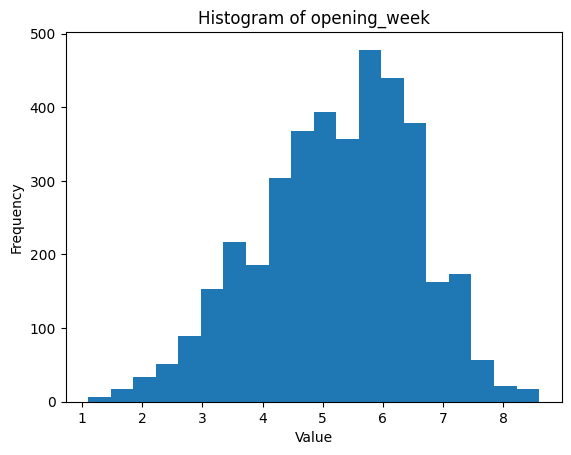

In [35]:
# Create the histogram
plt.hist(y_opening_week, bins=20)  # You can adjust the number of bins as needed

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of opening_week')

# Display the plot
plt.show()

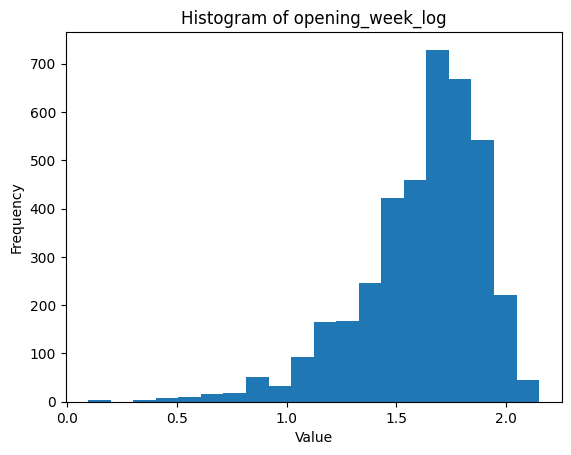

In [36]:
# Create the histogram
plt.hist(y_opening_week_log, bins=20)  # You can adjust the number of bins as needed

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of opening_week_log')

# Display the plot
plt.show()

### Scale Data - Opening Week

In [37]:
scalar_opening_week = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_opening_week[numerical_columns])

X_opening_week_scaled = pd.DataFrame(scalar_opening_week.transform(X_opening_week[numerical_columns]),columns=numerical_columns, index=X_opening_week.index)

# Reintroduce Binary Columns:
for binary_col in binary_columns:
  bin_s = X_opening_week[binary_col]
  X_opening_week_scaled[binary_col] = bin_s

feature_names = X_opening_week_scaled.columns
X_opening_week_scaled

,budget_usd,runtime_min,title_length,movie_desc_length,release_year,cast_count_total,cast_count_director,cast_count_writer,cast_count_cast,cast_count_producer,...,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September,budget_currency_CAD,budget_currency_EUR,budget_currency_GBP,budget_currency_RUB,budget_currency_USD
0,10.794462,5.855444,1.585410,1.311455,1.349766,5.075463,-0.185591,2.666758,0.687615,-0.554004,...,0,0,0,0,0,0,0,0,0,1
1,0.024508,2.566679,1.585410,0.306547,1.349766,0.797710,1.364710,-0.231943,0.051784,0.436954,...,0,0,0,0,0,0,0,0,0,1
2,0.688607,0.581009,-0.425215,-0.251735,1.349766,0.396019,-0.185591,-0.231943,-0.160160,-0.333791,...,0,0,1,0,0,0,0,0,0,1
3,0.079047,-0.349774,-1.095424,0.306547,0.650598,0.651640,-0.185591,-0.646043,0.608137,-0.003472,...,1,0,0,0,0,0,0,0,0,1
4,2.068136,5.669288,-1.095424,-0.028422,1.349766,2.112337,-0.185591,-0.646043,10.807935,0.326848,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,-0.433464,0.456905,-0.425215,0.641516,-1.446908,-0.592560,-0.185591,-0.646043,-0.848978,-0.884324,...,0,0,0,1,0,0,0,0,0,1
3897,-0.417661,-0.349774,0.244993,0.641516,0.650598,-0.535175,-0.185591,-0.231943,-0.584048,-0.994431,...,0,1,0,0,0,0,0,0,0,1
3898,-0.429409,-0.660034,0.915201,0.194891,-1.446908,-0.647336,-0.185591,-0.646043,-1.007935,-1.104537,...,0,0,0,1,0,0,0,0,0,1
3899,-0.394919,-0.846191,0.915201,-0.586704,-0.048571,-0.511700,-0.185591,-0.231943,-0.663527,-0.333791,...,0,0,0,0,0,0,0,0,0,1


### Split Train-Test - Opening Week

In [38]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_opening_week_scaled, y_opening_week_log, train_size = 0.8, random_state=0)
print(f"Train DataSet: {x_train_scaled.shape[0]} with {x_train_scaled.shape[1]} features")
print(f"Test DataSet: {x_test_scaled.shape[0]} with {x_test_scaled.shape[1]} features")

Train DataSet: 3120 with 96 features
Test DataSet: 781 with 96 features


## Basic Models - Opening Week USD

### Basic Model - Setting (Linear and Tree)

In [39]:
dict_of_models = {'LinearRegression':LinearRegression(),
                  'DecisionTreeRegressor':DecisionTreeRegressor()
                 }

In [40]:
parametersOfValue = {
    'fit_intercept':[True,False],
    'max_depth':[3,80],
    'learning_rate':[0.01,0.001],
    'random_state':[1],
    'n_estimators':[500]
    }

if skip_slow_processes==False:
  parametersOfValue['n_estimators'] = [500, 1000, 1500]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [41]:
all_model_combinations_df = get_all_model_combinations(dict_of_models,parametersOfValue)
all_model_combinations_df

Model Type: LinearRegression - 2 hyper-parameter combinations
Model Type: DecisionTreeRegressor - 2 hyper-parameter combinations


,model_type,fit_intercept,max_depth,random_state
LinearRegression_0,LinearRegression,True,NaN,NaN
LinearRegression_1,LinearRegression,False,NaN,NaN
DecisionTreeRegressor_0,DecisionTreeRegressor,NaN,3,1
DecisionTreeRegressor_1,DecisionTreeRegressor,NaN,80,1


In [42]:
all_model_combinations_df, dict_of_fitted_models = run_various_models_return_results(all_model_combinations_df, all_model_types)

Model #1 of 4
Model Name: LinearRegression_0
Model Props: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Train_score: 0.426 / Test_score: 0.373.

Model #2 of 4
Model Name: LinearRegression_1
Model Props: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}
Train_score: 0.433 / Test_score: 0.388.

Model #3 of 4
Model Name: DecisionTreeRegressor_0
Model Props: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
Train_score: 0.331 / Test_score: 0.322.

Model #4 of 4
Model Name: DecisionTreeRegressor_1
Model Props: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 80, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'r

In [43]:
all_model_combinations_df

,model_type,fit_intercept,max_depth,random_state,train_score,val_score,test_score_r2,test_score_mse,train_size,test_size,feature_n,run_time
LinearRegression_1,LinearRegression,False,NaN,NaN,0.433458,-1.985955e+19,0.387799,0.044231,3120.0,781.0,96.0,0.3625
LinearRegression_0,LinearRegression,True,NaN,NaN,0.426228,-1.165525e+17,0.373018,0.045299,3120.0,781.0,96.0,0.3885
DecisionTreeRegressor_0,DecisionTreeRegressor,NaN,3,1,0.331245,3.036125e-01,0.321814,0.048999,3120.0,781.0,96.0,0.1653
DecisionTreeRegressor_1,DecisionTreeRegressor,NaN,80,1,1.000000,-1.162023e-01,-0.133220,0.081874,3120.0,781.0,96.0,0.3507


Finally, we will have a data frame containning our models, their instructions, and their resaults:

### Basic Models - Best Performing

<br><b>Best Performing model:</b><br>
Since we collected all sort of output scores from our model, we can check and see which model performed best for each category:

In [44]:
cols_to_show = ['model_type','fit_intercept','max_depth','train_score','val_score','test_score_r2','test_score_mse','run_time']
print(f"Top 3 performing models based on test_score Score")
all_model_combinations_df[cols_to_show].sort_values(by='test_score_r2', ascending=False).head(3)

Top 3 performing models based on test_score Score


,model_type,fit_intercept,max_depth,train_score,val_score,test_score_r2,test_score_mse,run_time
LinearRegression_1,LinearRegression,False,NaN,0.433458,-1.985955e+19,0.387799,0.044231,0.3625
LinearRegression_0,LinearRegression,True,NaN,0.426228,-1.165525e+17,0.373018,0.045299,0.3885
DecisionTreeRegressor_0,DecisionTreeRegressor,NaN,3,0.331245,3.036125e-01,0.321814,0.048999,0.1653


### Basic Models - Plot results

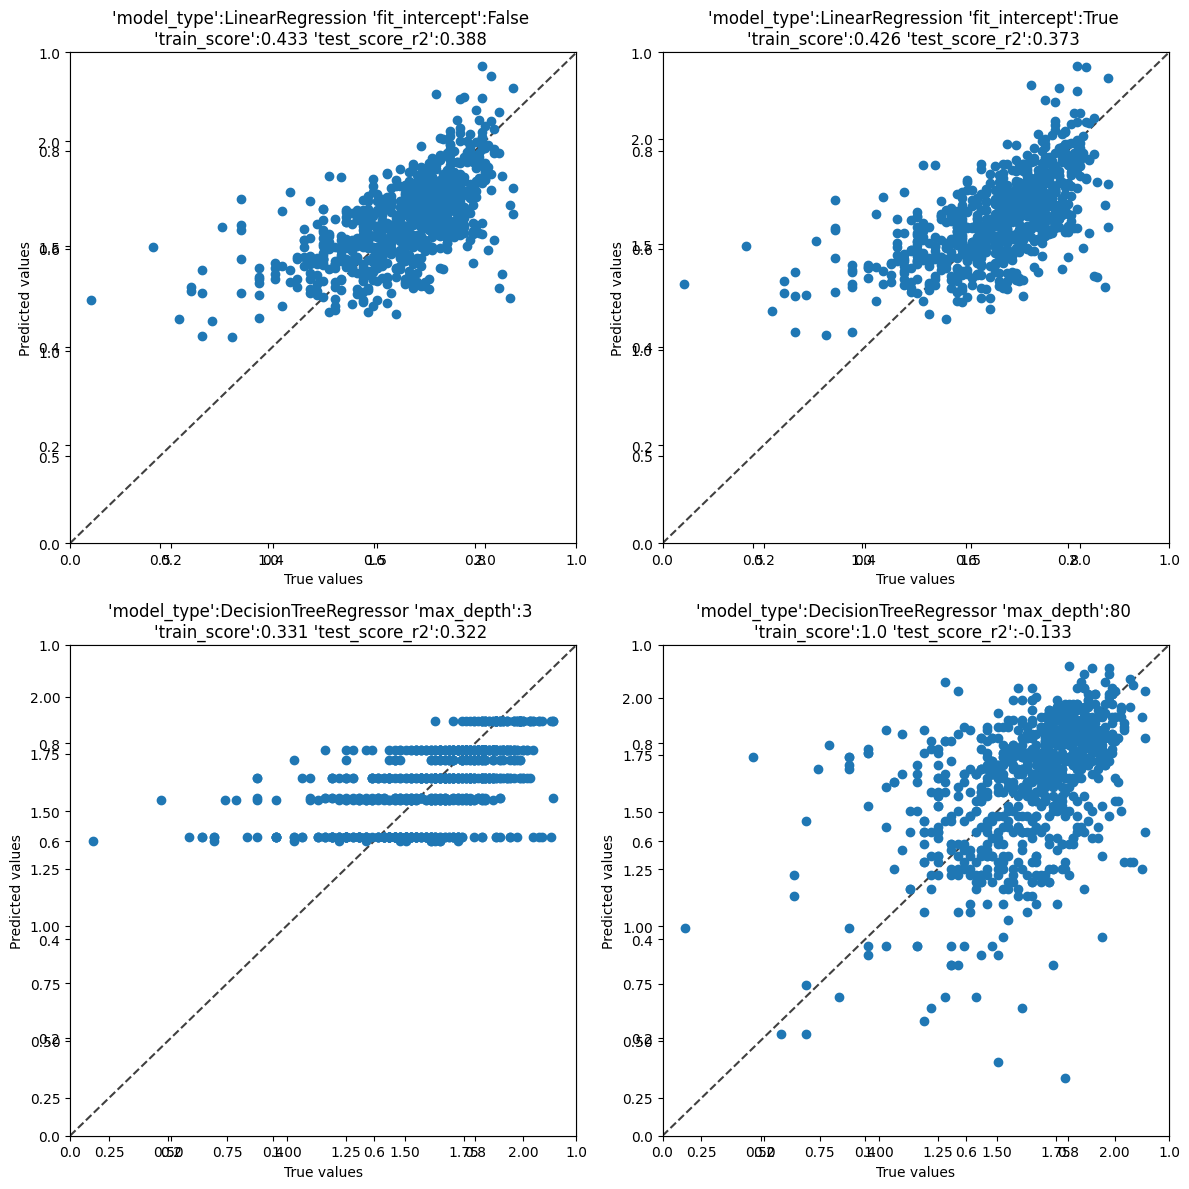

In [45]:
scatterplot_model_preformence(all_model_combinations_df,dict_of_fitted_models)

In [46]:
best_performing_model = all_model_combinations_df.sort_values(by='test_score_r2', ascending=False).head(1)
best_model = dict_of_fitted_models[best_performing_model.index[0]]
print(f"Our best performing model so far is {best_model} --> {round(best_performing_model['test_score_r2'][0],3)} test_score score")

Our best performing model so far is LinearRegression(fit_intercept=False) --> 0.388 test_score score


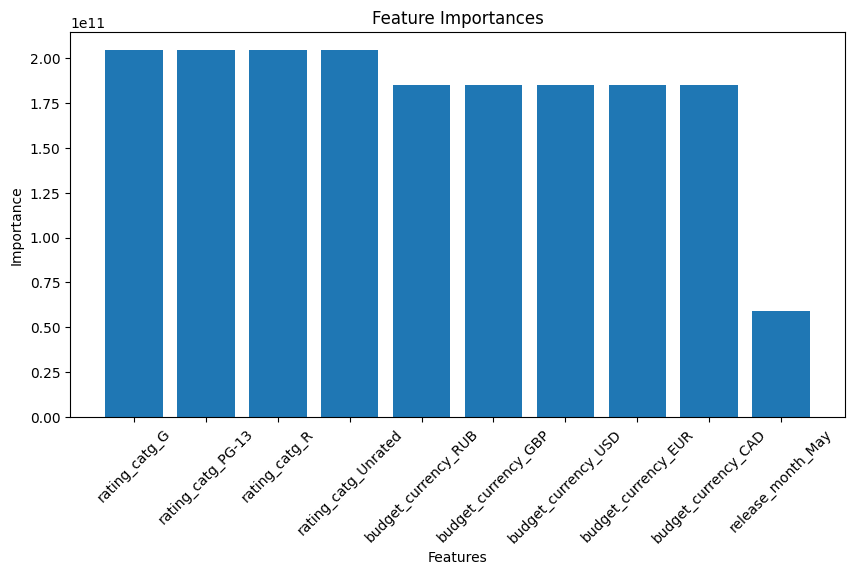

In [47]:
coefficients = best_model.coef_

# Display feature importances
feature_importances = pd.DataFrame(
    {"Feature": feature_names, "Importance": np.abs(coefficients)}
)
feature_importances = feature_importances.sort_values(
    by="Importance", ascending=False
)

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.bar(feature_importances['Feature'].head(10), feature_importances['Importance'].head(10))
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(range(10), feature_importances['Feature'].head(10), rotation=45)
plt.show()

## Boosting Models - Opening Week

<br><b>Ensemble Models:</b><br>
Ensemble models are machine learning algorithms that combine the predictions of multiple base models to make more accurate predictions.

Unlike Single Classification models where we used cross-val on our training set, for Bootstrapping methods we will need to create a separate validation data-set

In [48]:
dict_of_models = {'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

In [49]:
parametersOfValue = {
    'estimator':[None],
    'n_estimators':[500],
    'max_depth':[50,80],
    'learning_rate':[0.01,0.1],
    'random_state':[1]
    }

if skip_slow_processes==False:
  parametersOfValue['estimator'] = [None,best_model]
  parametersOfValue['n_estimators'] = [500,1000, 2000]
  parametersOfValue['max_depth'] = [20,50,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [50]:
boosting_model_combinations_df = get_all_model_combinations(dict_of_models,parametersOfValue)
boosting_model_combinations_df

Model Type: AdaBoostRegressor - 2 hyper-parameter combinations
Model Type: XGBRegressor  - 4 hyper-parameter combinations


,model_type,estimator,learning_rate,n_estimators,random_state,max_depth
AdaBoostRegressor_0,AdaBoostRegressor,None,0.01,500,1,NaN
AdaBoostRegressor_1,AdaBoostRegressor,None,0.1,500,1,NaN
XGBRegressor _0,XGBRegressor,NaN,0.01,500,1,50
XGBRegressor _1,XGBRegressor,NaN,0.01,500,1,80
XGBRegressor _2,XGBRegressor,NaN,0.1,500,1,50
XGBRegressor _3,XGBRegressor,NaN,0.1,500,1,80


In [51]:
boosting_model_combinations_df, dict_boosting_models = run_various_models_return_results(boosting_model_combinations_df, all_model_types, use_cross_validate=False)

Model #1 of 6
Model Name: AdaBoostRegressor_0
Model Props: {'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 500, 'random_state': 1}
Train_score: 0.383 / Test_score: 0.352.

Model #2 of 6
Model Name: AdaBoostRegressor_1
Model Props: {'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 500, 'random_state': 1}
Train_score: 0.332 / Test_score: 0.253.

Model #3 of 6
Model Name: XGBRegressor _0
Model Props: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'ma

In [52]:
boosting_model_combinations_df

,model_type,estimator,learning_rate,n_estimators,random_state,max_depth,train_score,val_score,test_score_r2,test_score_mse,train_size,test_size,feature_n,run_time
XGBRegressor _2,XGBRegressor,None,0.1,500,1,50,0.999997,NaN,0.401709,0.043226,3120.0,781.0,96.0,13.4325
XGBRegressor _3,XGBRegressor,None,0.1,500,1,80,0.999997,NaN,0.401588,0.043235,3120.0,781.0,96.0,13.6110
XGBRegressor _0,XGBRegressor,None,0.01,500,1,50,0.996428,NaN,0.385140,0.044423,3120.0,781.0,96.0,47.8778
XGBRegressor _1,XGBRegressor,None,0.01,500,1,80,0.996428,NaN,0.385140,0.044423,3120.0,781.0,96.0,46.7266
AdaBoostRegressor_0,AdaBoostRegressor,None,0.01,500,1,NaN,0.383069,NaN,0.352440,0.046786,3120.0,781.0,96.0,14.1897
AdaBoostRegressor_1,AdaBoostRegressor,None,0.1,500,1,NaN,0.332343,NaN,0.252916,0.053976,3120.0,781.0,96.0,4.2479


### Boosting - Plot Results

In [ ]:
scatterplot_model_preformence(boosting_model_combinations_df.head(6),dict_boosting_models)

For Boosting model we would prefer to keep our trees shallow and non-complex, since they are built sequntially and we do not want to risk ovefitting.<br>
Next, we would like to explor some highly deel trees:

## Bagging Models - Opening Week

In BaggingClassifier, the subsets of the training data are generated using bootstrap sampling, which means that each subset is a random sample of the training data with replacement.<br>
It involves training multiple base models independently on different subsets of the training data, and then combining the predictions of the individual base models to make a final prediction.

In [ ]:
dict_of_models = {'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                 }

In [ ]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(feature_names))), int(len(feature_names)/3)],
    'n_estimators':[500],
    'max_depth':[3,5],
    'learning_rate':[0.01,0.001],
    'random_state':[1]
    }

if skip_slow_processes==False:
  parametersOfValue['estimator'] = [None,best_model]
  parametersOfValue['n_estimators'] = [500, 1000, 1500]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [ ]:
bagging_model_combinations_df = get_all_model_combinations(dict_of_models,parametersOfValue)
bagging_model_combinations_df

In [ ]:
bagging_model_combinations_df, dict_bagging_models = run_various_models_return_results(bagging_model_combinations_df, all_model_types, use_cross_validate=False)

In [ ]:
bagging_model_combinations_df

### Bagging - Plot results

In [ ]:
scatterplot_model_preformence(bagging_model_combinations_df.head(6),dict_bagging_models)

<br><b>Random Forest feature selection:</b><br>
Same as bagging, only with random feature selection

In [ ]:
best_bagging_model = dict_bagging_models[bagging_model_combinations_df.sort_values(by="test_score_r2",ascending=False).head(1).index[0]]
best_bagging_model

In [ ]:
def get_feature_importance_random_forest(rf_model, threshold=0):
  top_feature_dict = {col:0 for col in feature_names}

  for dtree in rf_model.estimators_:
      top_feature_Id = dtree.tree_.feature[0]
      top_feature_name = feature_names[top_feature_Id]
      
      top_feature_dict[top_feature_name]+=1
      
  top_features_rf = pd.DataFrame(top_feature_dict, index=["Top Count - Random Forest"]).head(1).T

  columns_to_run = list(top_features_rf[top_features_rf['Top Count - Random Forest']>0].index)
  return top_features_rf.sort_values(["Top Count - Random Forest"], ascending=False),columns_to_run

In [ ]:
top_features_rf,columns_to_run = get_feature_importance_random_forest(best_bagging_model, threshold=0)
print(f"Columns To Keep: {columns_to_run}")
top_features_rf

## Feature Reduction - Opening Week

In [ ]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(columns_to_run))), int(len(columns_to_run)/3)],
    'n_estimators':[500],
    'max_depth':[3,5],
    'learning_rate':[0.01,0.001],
    'random_state':[1]
    }


if skip_slow_processes==False:
  parametersOfValue['estimator'] = [None,best_model]
  parametersOfValue['n_estimators'] = [500, 1000, 1500]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [ ]:
dict_of_models = {'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                 }

In [ ]:
rf_model_thin_df = get_all_model_combinations(dict_of_models,parametersOfValue)
rf_model_thin_df

### Run thin models

In [ ]:
rf_model_thin_df, dict_rf_model_thin = run_various_models_return_results(rf_model_thin_df, all_model_types, use_cross_validate=False, limit_features_list=columns_to_run)

In [ ]:
rf_model_thin_df.index = 'Thin_' + rf_model_thin_df.index.astype(str)
rf_model_thin_df

## Comapring all models - Opening Week

In [ ]:
all_models_output = boosting_model_combinations_df.append(bagging_model_combinations_df).append(rf_model_thin_df).append(all_model_combinations_df)
all_models_output.sort_values(by="test_score_r2", ascending=False)

## Best Model - First Week USD

In [ ]:
best_output_first_week = all_models_output.sort_values(by="test_score_r2", ascending=False).head(1)
best_model_first_week = output_to_fitted_model(best_output_first_week,columns_to_run=None)
best_model_first_week

# Gross Revenue USD

## Data Preparing

### Filter Missing Ys - Gross Revenue

In [ ]:
gross_rev_na_mask = y_gross_us_canada.isna()
y_gross_rev = y_gross_us_canada[~gross_rev_na_mask]
y_gross_rev_log = np.log(y_gross_rev)
X_gross_rev = X_ohe_reduced[~gross_rev_na_mask]
X_gross_rev.shape,y_gross_rev.shape
print(f"Only {len(y_gross_rev)} out of {len(gross_rev_na_mask)} records had Gross Rev Revenue and will be kept")

In [ ]:
# Create the histogram
plt.hist(y_gross_rev, bins=20)  # You can adjust the number of bins as needed

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of gross_rev')

# Display the plot
plt.show()

In [ ]:
# Create the histogram
plt.hist(y_gross_rev_log, bins=20)  # You can adjust the number of bins as needed

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of gross_rev_log')

# Display the plot
plt.show()

### Scale Data - Gross Revenue

In [ ]:
scalar_gross_rev = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_gross_rev[numerical_columns])

X_gross_rev_scaled = pd.DataFrame(scalar_gross_rev.transform(X_gross_rev[numerical_columns]),columns=numerical_columns, index=X_gross_rev.index)

# Reintroduce Binary Columns:
for binary_col in binary_columns:
  bin_s = X_gross_rev[binary_col]
  X_gross_rev_scaled[binary_col] = bin_s

feature_names = X_gross_rev_scaled.columns
X_gross_rev_scaled

### Split Train-Test - Gross Revenue

In [ ]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_gross_rev_scaled, y_gross_rev_log, train_size = 0.8, random_state=0)
print(f"Train DataSet: {x_train_scaled.shape[0]} with {x_train_scaled.shape[1]} features")
print(f"Test DataSet: {x_test_scaled.shape[0]} with {x_test_scaled.shape[1]} features")

## Exploring all models - Gross Revenue

In [ ]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(feature_names))), int(len(feature_names)/3)],
    'n_estimators':[500],
    'max_depth':[3,5],
    'learning_rate':[0.01,0.001],
    'random_state':[1]
    }


if skip_slow_processes==False:
  parametersOfValue['estimator'] = [None,best_model]
  parametersOfValue['n_estimators'] = [500, 1000, 2000]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [ ]:
all_model_types = {'LinearRegression':LinearRegression()
                  ,'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                  ,'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

In [ ]:
all_model_combinations_gross_rev = get_all_model_combinations(all_model_types,parametersOfValue)
all_model_combinations_gross_rev

Run the top 10 performing models using the narrowed dataset in hope to reduce 

In [ ]:
all_model_combinations_gross_rev, dict_of_fitted_models_gross_rev = run_various_models_return_results(all_model_combinations_gross_rev.head(10), all_model_types)

In [ ]:
all_model_combinations_gross_rev.sort_values(by="test_score_r2", ascending=False)

In [ ]:
scatterplot_model_preformence(all_model_combinations_gross_rev.head(8),dict_of_fitted_models_gross_rev)

In [ ]:
best_output_gross_rev = all_model_combinations_gross_rev.sort_values(by="test_score_r2", ascending=False).head(1)
best_model_gross_rev = output_to_fitted_model(best_output_gross_rev,columns_to_run=None)
best_model_gross_rev

# Meta Score

## Data Preparing

### Filter Missing Ys - Metascore

In [ ]:
metascore_na_mask = y_metascore.isna()
y_metascore = y_metascore[~metascore_na_mask]
X_metascore = X_ohe_reduced[~metascore_na_mask]
X_metascore.shape,y_metascore.shape
print(f"Only {len(y_metascore)} out of {len(metascore_na_mask)} records had Gross Rev Revenue and will be kept")

In [ ]:
y_metascore

In [ ]:
# Create the histogram
plt.hist(y_metascore, bins=25)  # You can adjust the number of bins as needed

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of metascore')

# Display the plot
plt.show()

### Scale Data - Metascore

In [ ]:
scalar_metascore = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_metascore[numerical_columns])

X_metascore_scaled = pd.DataFrame(scalar_metascore.transform(X_metascore[numerical_columns]),columns=numerical_columns, index=X_metascore.index)

# Reintroduce Binary Columns:
for binary_col in binary_columns:
  bin_s = X_metascore[binary_col]
  X_metascore_scaled[binary_col] = bin_s

feature_names = X_metascore_scaled.columns
X_metascore_scaled

### Split Train-Test - Metascore

In [ ]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_metascore_scaled, y_metascore, train_size = 0.8, random_state=0)
print(f"Train DataSet: {x_train_scaled.shape[0]} with {x_train_scaled.shape[1]} features")
print(f"Test DataSet: {x_test_scaled.shape[0]} with {x_test_scaled.shape[1]} features")

## Exploring all models - Metascore

In [ ]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(feature_names))), int(len(feature_names)/3)],
    'n_estimators':[500],
    'max_depth':[3,5],
    'learning_rate':[0.01,0.001],
    'random_state':[1]
    }


if skip_slow_processes==False:
  parametersOfValue['estimator'] = [None,best_model]
  parametersOfValue['n_estimators'] = [500, 1000, 2000]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [ ]:
all_model_types = {'LinearRegression':LinearRegression()
                  ,'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                  ,'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

In [ ]:
all_model_combinations_metascore = get_all_model_combinations(all_model_types,parametersOfValue)
all_model_combinations_metascore

In [ ]:
all_model_combinations_metascore, dict_of_fitted_models_metascore = run_various_models_return_results(all_model_combinations_metascore, all_model_types)

In [ ]:
all_model_combinations_metascore.sort_values(by="test_score_r2", ascending=False)

In [ ]:
scatterplot_model_preformence(all_model_combinations_metascore.head(8),dict_of_fitted_models_metascore)

In [ ]:
best_output_metascore = all_model_combinations_metascore.sort_values(by="test_score_r2", ascending=False).head(1)
best_model_metascore = output_to_fitted_model(best_output_metascore,columns_to_run=None)
best_model_metascore

# User Rating

## Data Preparing

### Filter Missing Ys - User Rating

In [ ]:
user_rating_na_mask = y_user_rating.isna()
y_user_rating = y_user_rating[~user_rating_na_mask]
X_user_rating = X_ohe_reduced[~user_rating_na_mask]
X_user_rating.shape,y_user_rating.shape
print(f"Only {len(y_user_rating)} out of {len(user_rating_na_mask)} records had Gross Rev Revenue and will be kept")

In [ ]:
y_user_rating

In [ ]:
# Create the histogram
plt.hist(y_user_rating, bins=25)  # You can adjust the number of bins as needed

# Add labels
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add a title
plt.title('Histogram of user_rating')

# Display the plot
plt.show()

### Scale Data - User Rating

In [ ]:
scalar_user_rating = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_user_rating[numerical_columns])

X_user_rating_scaled = pd.DataFrame(scalar_user_rating.transform(X_user_rating[numerical_columns]),columns=numerical_columns, index=X_user_rating.index)

# Reintroduce Binary Columns:
for binary_col in binary_columns:
  bin_s = X_user_rating[binary_col]
  X_user_rating_scaled[binary_col] = bin_s

feature_names = X_user_rating_scaled.columns
X_user_rating_scaled

### Split Train-Test - User Rating

In [ ]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_user_rating_scaled, y_user_rating, train_size = 0.8, random_state=0)
print(f"Train DataSet: {x_train_scaled.shape[0]} with {x_train_scaled.shape[1]} features")
print(f"Test DataSet: {x_test_scaled.shape[0]} with {x_test_scaled.shape[1]} features")

## Exploring all models - User Rating

In [ ]:
parametersOfValue = {
    'estimator':[None], 
    'max_features': [int(math.sqrt(len(feature_names))), int(len(feature_names)/3)],
    'n_estimators':[500],
    'max_depth':[3,5],
    'learning_rate':[0.01,0.001],
    'random_state':[1]
    }


if skip_slow_processes==False:
  parametersOfValue['estimator'] = [None,best_model]
  parametersOfValue['n_estimators'] = [500, 1000, 2000]
  parametersOfValue['max_depth'] = [3,4,5,80,100]
  parametersOfValue['learning_rate'] = [0.1,0.01,0.001]

In [ ]:
all_model_types = {'LinearRegression':LinearRegression()
                  ,'DecisionTreeRegressor':DecisionTreeRegressor()
                  ,'BaggingRegressor ':BaggingRegressor()
                  ,'RandomForestRegressor':RandomForestRegressor()
                  ,'AdaBoostRegressor':AdaBoostRegressor()
                  ,'XGBRegressor ':xgb.XGBRegressor()
                 }

In [ ]:
all_model_combinations_user_rating = get_all_model_combinations(all_model_types,parametersOfValue)
all_model_combinations_user_rating

In [ ]:
all_model_combinations_user_rating, dict_of_fitted_models_user_rating = run_various_models_return_results(all_model_combinations_user_rating, all_model_types)

In [ ]:
all_model_combinations_user_rating.sort_values(by="test_score_r2", ascending=False)

In [ ]:
scatterplot_model_preformence(all_model_combinations_user_rating.head(8),dict_of_fitted_models_user_rating)

In [ ]:
best_output_user_rating = all_model_combinations_user_rating.sort_values(by="test_score_r2", ascending=False).head(1)
best_model_user_rating = output_to_fitted_model(best_output_user_rating,columns_to_run=None)
best_model_user_rating